In [1]:
import  pandas as pd
import numpy as np
import scaleogram as scg
import matplotlib.pyplot as plt
import pywt
import scaleogram as scg 

# choose default wavelet function for the entire notebook



In [2]:
from savgol import savitzky_golay

# Example with the scipy.signal.cwt

/Users/somayeh/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


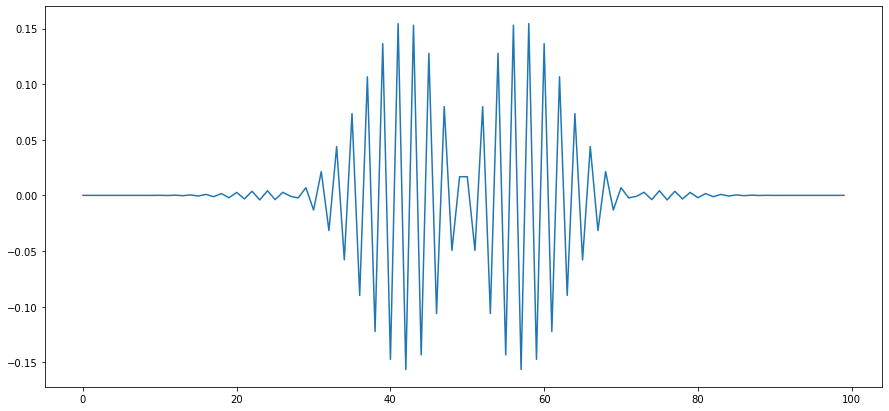

In [3]:
from scipy import signal
import matplotlib.pyplot as plt


plt.figure(figsize=(15,7))
M = 100
s = 10.0
w = 30.0
wavelet = signal.morlet2(M, s, w)
plt.plot((wavelet))

0.002506265664160401
399.0


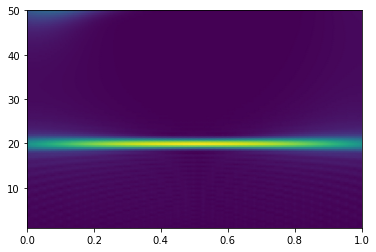

In [4]:
from scipy import signal
import matplotlib.pyplot as plt

t, dt = np.linspace(0, 1, 400, retstep=True)
print(dt)
fs = 1/dt
print(fs)
w = 30.
sig = np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
freq = np.linspace(1, 50, 100)
widths = w*fs / (2*freq*np.pi)
# print(widths)
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')

In [6]:
# Read in light curves of OGLE-LMC-RRLYR-00854 from OGLE and ASAS-SN

df1 = pd.read_csv('lc/OGLE-LMC-RRLYR-00854/ASASSN-V J044620.28-682529.9.csv', usecols=[0,3,4],skiprows=1, names=['t','m','e'])
df2 = pd.read_table('lc/OGLE-LMC-RRLYR-00854/OGLE-LMC-RRLYR-00854.dat',delimiter=' ', names=['t','m','e'])

In [7]:
#Sorting ASAS-SN light curve

df1 = df1.sort_values(by=['t']).reset_index(drop=True)

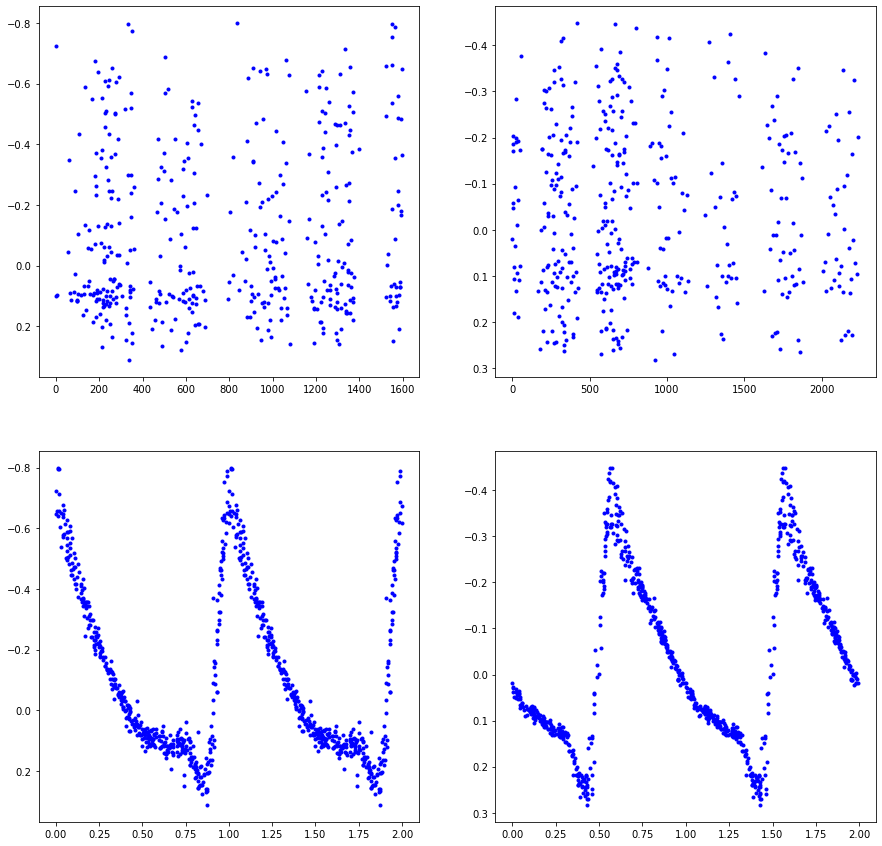

In [8]:
p = 0.516283
p2 = 0.5162796

fig, axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].plot(df1.t-min(df1.t), df1.m-np.median(df1.m),'b.')
axs[0,1].plot(df2.t-min(df2.t), df2.m-np.median(df2.m),'b.')

axs[1,0].plot(((df1.t-min(df1.t))/p) - np.fix((df1.t-min(df1.t))/p), df1.m-np.median(df1.m),'b.',\
             ((df1.t-min(df1.t))/p) - np.fix((df1.t-min(df1.t))/p)+1, df1.m-np.median(df1.m),'b.')
axs[1,1].plot(((df2.t-min(df2.t))/p)-np.fix((df2.t-min(df2.t))/p), df2.m-np.median(df2.m),'b.',\
             ((df2.t-min(df2.t))/p)-np.fix((df2.t-min(df2.t))/p)+1, df2.m-np.median(df2.m),'b.')


# ax[]
axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[1,0].invert_yaxis()
axs[1,1].invert_yaxis()

0.19893700000829997
0.2984540000000379


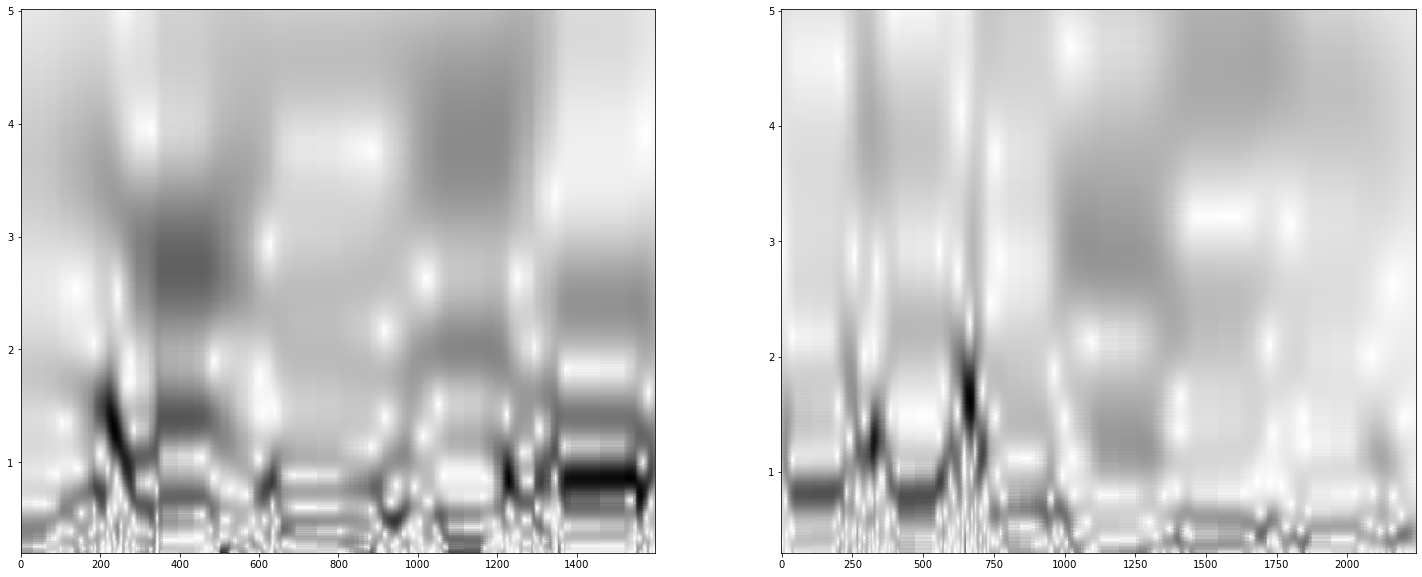

In [9]:
from scipy import signal
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(25,10))


# t, dt = np.linspace(0, 1, 400, retstep=True)
t = df1.t.values - df1.t.values[0]
dt = np.median(np.diff(df1.t.values))

nyquist = 10 * (1./dt)


minimum_period = 1/nyquist
print(minimum_period)
maximum_period = 5#t[-1]
period = np.geomspace(minimum_period, maximum_period, 512)

w = 6

widths = w * nyquist * period / np.pi
cwtm = signal.cwt(df1.m.values- np.median(df1.m.values), signal.morlet2, widths, w=w)
power = np.abs(cwtm)#np.abs(cwtm)**2 / widths[:, np.newaxis]


# print(dt)
# fs = 1./dt
# print(fs)
# w = 1.
# sig = df1.m.values #- np.median(df1.m.values) #np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
# freq = np.linspace(1, 5, 100)
# widths = w*fs / (2*freq*np.pi)
# # print(widths)
# cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
# power = np.abs(cwtm)**2 / widths[:, np.newaxis]
cc = axs[0].pcolormesh(t, period, power, shading='auto', 
                cmap='binary')
# fig.colorbar(cc)
# axs[0].set_yscale('log')


t = df2.t.values - df2.t.values[0]
dt = np.median(np.diff(df2.t.values))
# # print(dt)
# fs = 1./dt
# # print(/fs)
# w = 1.
# sig = df2.m.values#- np.median(df2.m.values) #np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
# freq = np.linspace(1, 5, 100)
# widths = w*fs / (2*freq*np.pi)
# # print(widths)
# cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
# power = np.abs(cwtm)**2 / widths[:, np.newaxis]

nyquist = 10 * (1./dt)


minimum_period = 1/nyquist
print(minimum_period)
maximum_period = 5#t[-1]
period = np.geomspace(minimum_period, maximum_period, 512)

w = 6

widths = w * nyquist * period / np.pi
cwtm = signal.cwt(df2.m.values- np.median(df2.m.values), signal.morlet2, widths, w=w)
power = np.abs(cwtm) #np.abs(cwtm)**2 / widths[:, np.newaxis]


cc = axs[1].pcolormesh(t, period, power, shading='auto', 
                cmap='binary')
# fig.colorbar(cc)
# axs[1].set_yscale('log')
# plt.show()

(0.0, 20.0)

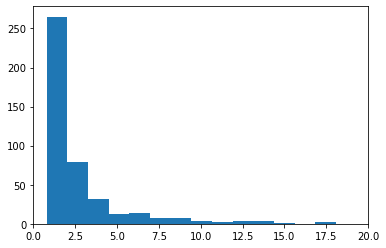

In [10]:
plt.hist(np.diff(df1.t.values), bins = 100)
# plt.hist(np.diff(df2.t.values), bins = 100)
plt.xlim(0,20)

In [11]:
df1.t = df1.t-df1.t[0]
data1 = df1[['t', 'm']].groupby('t').sum().squeeze()

# scg.set_default_wavelet('cmor1-1.5')

In [12]:
scales = scg.periods2scales(np.linspace(0.1,1,200), dt = np.median(np.diff(df1.t.values)))

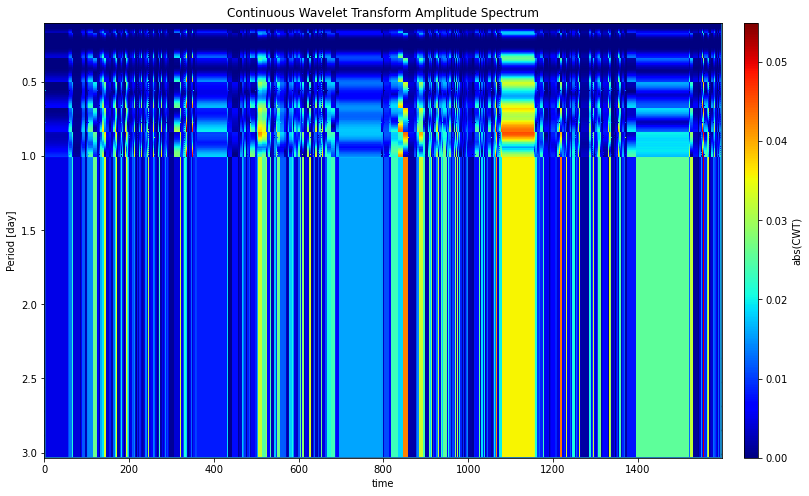

In [13]:
data1_normed = data1-data1.median()
ax = scg.cws(df1.t.values, df1.m.values- np.median(df1.m.values), figsize=(13.2, 8),yaxis='period',\
             xlabel="time",\
             scales=scales, ylabel="Period [day]")
# set_x_yearly(ax, len(births))

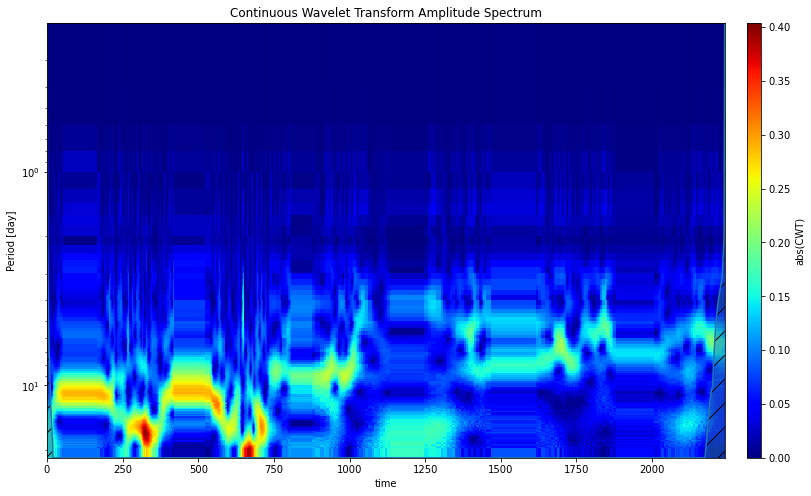

In [17]:
df2.t = df2.t-df2.t[0]
data2 = df2[['t', 'm']].groupby('t').sum().squeeze()

scales = scg.periods2scales(np.arange(0.01,1,0.01), dt= 0.1)#, dt = np.median(np.diff(df1.t.values)))

data2_normed = data2-data2.median()
ax = scg.cws(df2.t.values, data2_normed, figsize=(13.2, 8),yaxis='period', xlabel="time",\
             scales=scales, ylabel="Period [day]", yscale='log')